<a href="https://colab.research.google.com/github/yongzhiqu/IE_4495/blob/master/CH07_SEC02_DMD_Cylinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 16]

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vortall_mat = io.loadmat(os.path.join('/content/drive/MyDrive/Colab Notebooks/','DATA','VORTALL.mat'))
X = vortall_mat['VORTALL']
# VORTALL contains flow fields reshaped into column vectors

In [ ]:
def DMD(X,Xprime,r): # X is the snapshot without time delay, Xprime is the time delayed version of X, 
# r is the rank you selecte
# A function is a synbolic fomular, you do not need to initialize your symbol
# you need to pass value to you symbol outside this function definition
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda) # non-zero lambda for A and non-zero lambdas for A ~ are the same!!!! 
    # naively we can A to predict between snapshot 
    # A more effieicient way would be use the mode and mode amplitude

    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4 find the DMD Mode, 
    # this is essentially the same as the eigenvector of A for X' = AX
    # eigen_vector  M*v1 = v1*lambda 
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1) # DMD mode amplitude for first snatshot -- a vector
    # modes amplitudes for first snapshot for each modes
    B = np.linalg.solve(W @ Lambda,Sigmar @ VTr) # DMD mode amplitudes for all snapshot -- a matrix
    return Phi, Lambda, b

In [ ]:
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],21)
print(Phi.shape)
print(Lambda.shape)
print(b.shape)
print(Lambda)

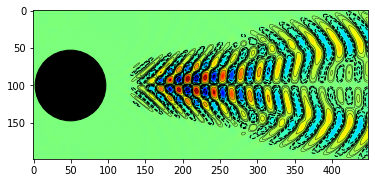

In [ ]:
## Plot Mode 2
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Phi[:,1],(449,199))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(49,99,5000,color='k') # draw cylinder


plt.show()
# when we are doing dmd [449 * 199] * 21= [89351,1] * 21


In [ ]:
Y1_Predict2 = Phi@Lambda@(np.array(b).T); # predicted second snapshot
Y1_Predict6 = Phi@Lambda**5@(np.array(b).T); # predicted six snapshot
Y1_Predict11 = Phi@Lambda**10@(np.array(b).T); # predicted 11th snapshot
Y1_Predict20 = Phi@Lambda**19@(np.array(b).T); # predicted 20st snapshot



In [ ]:
print(Y1_Predict2.shape)
print(Y1_Predict6.shape)
print(Y1_Predict11.shape)

(89351,)
(89351,)
(89351,)


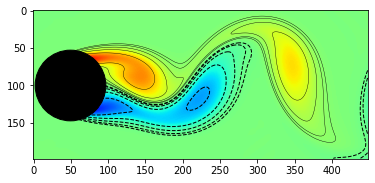

In [ ]:
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Y1_Predict20,(449,199))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(49,99,5000,color='k') # draw cylinder


plt.show()

In [ ]:
## Plot Mode 2
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Phi[:,5],(449,199))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(49,99,5000,color='k') # draw cylinder


plt.show()

In [ ]:
V2 = np.real(np.reshape(Phi[:,1],(199,449)))

# plt.hist(np.real(Phi).reshape(-1),128)
plt.hist(V2.reshape(-1),128)
plt.show()